In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env
import acquire
import explore
from wrangle import wrangle_zillow
from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

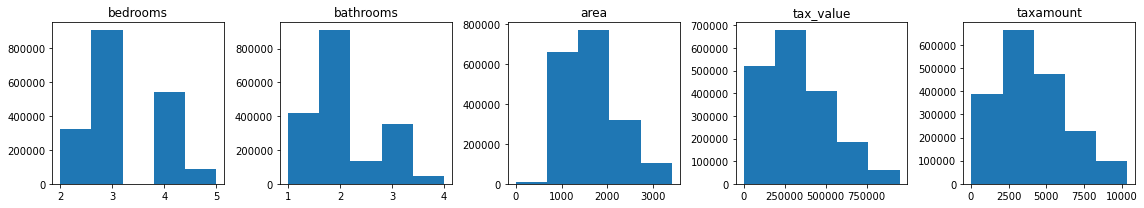

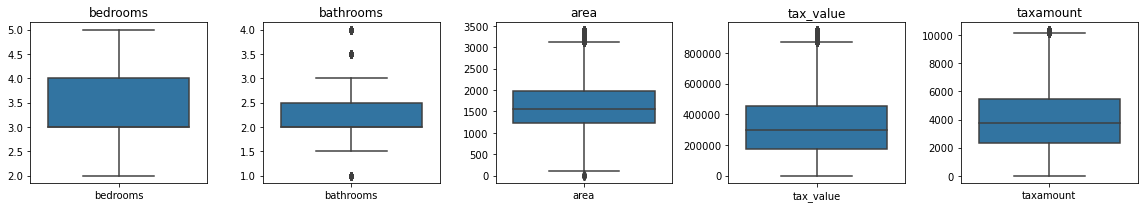

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0


In [8]:
train["fips"] = pd.to_numeric(train["fips"])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   fips        1038959 non-null  float64
dtypes: float64(6)
memory usage: 55.5 MB


In [10]:
small_train = train.head(5000)

In [12]:
cols = ['bedrooms','bathrooms','area','tax_value','year_built','fips']

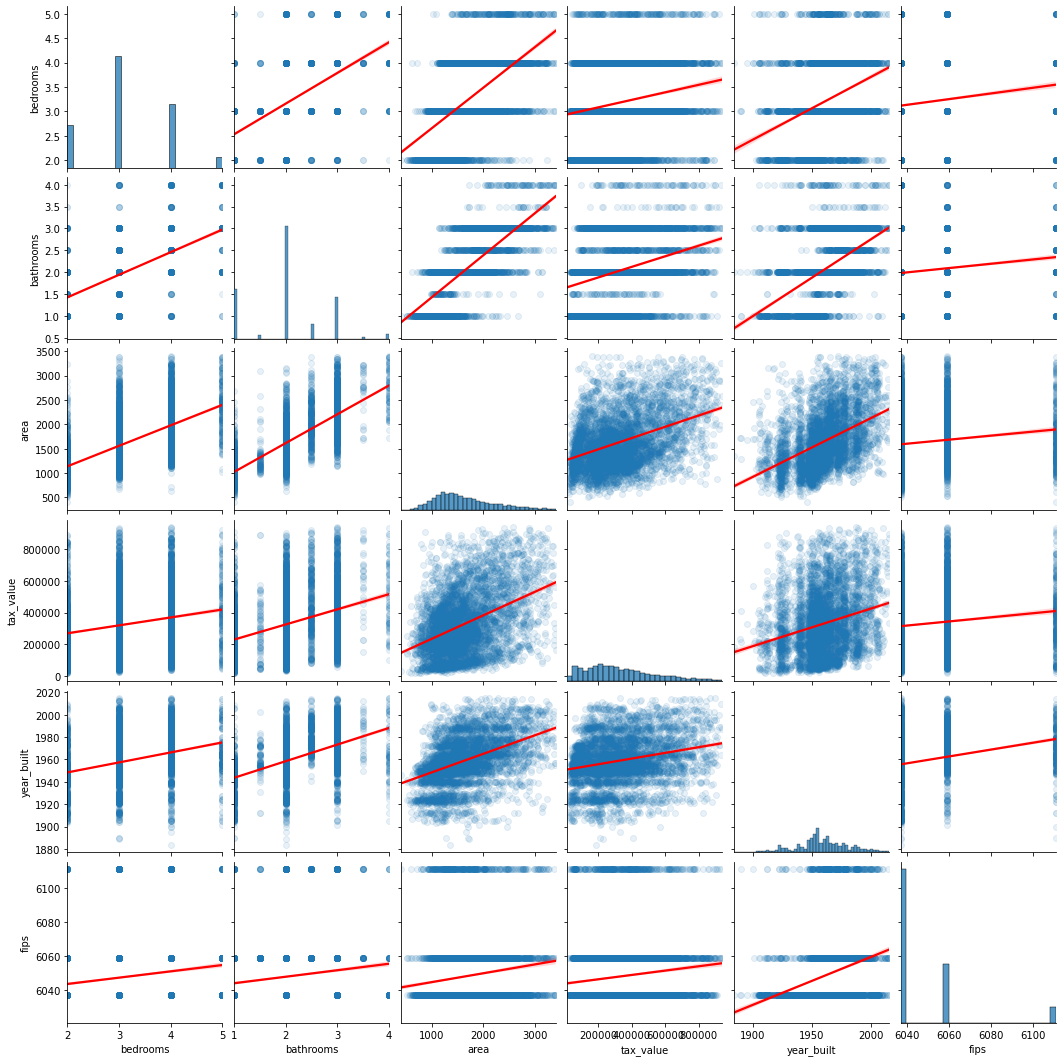

In [13]:
explore.plot_variable_pairs(small_train,cols)

<AxesSubplot:>

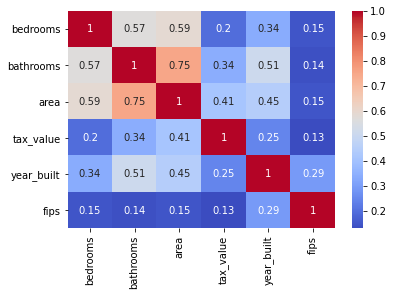

In [17]:
correlation_table = small_train.corr()
sns.heatmap(correlation_table, cmap="coolwarm", annot=True)

Some takeaways:

Area is a driver of tax_value

Bathrooms are a driver of area, I assume the bigger the place, the more bathrooms you're going to put it in, vs having 1 bathroom for somewhere between 1-2 bedrooms

In [20]:
r, p = stats.pearsonr(small_train.tax_value, small_train.area)
print(r,p)

0.4140630820698009 2.0693362630353686e-206
